In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('uber.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
data['distance']=((data['pickup_longitude']-data['dropoff_longitude'])**2+(data['pickup_latitude']-data['dropoff_latitude'])**2)**0.5
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['day_of_week']=data['pickup_datetime'].dt.dayofweek
data['hour']=data['pickup_datetime'].dt.hour

In [5]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,day_of_week,hour
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,0.015140,3,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,0.022103,4,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0.053109,0,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,0.016528,4,8
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,0.051031,3,17


In [6]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
distance             1
day_of_week          0
hour                 0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(199999, 12)

In [9]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'distance', 'day_of_week',
       'hour'],
      dtype='object')

In [10]:
x=data[['passenger_count','day_of_week','hour','fare_amount','distance']]

In [11]:
x

,passenger_count,day_of_week,hour,fare_amount,distance
0,1,3,19,7.5,0.015140
1,1,4,20,7.7,0.022103
2,1,0,21,12.9,0.053109
3,3,4,8,5.3,0.016528
4,5,3,17,16.0,0.051031
...,...,...,...,...,...
199995,1,6,10,3.0,0.001064
199996,1,4,1,7.5,0.022126
199997,2,0,0,30.9,0.142223
199998,1,2,14,14.5,0.033101


In [12]:
x.describe()

,passenger_count,day_of_week,hour,fare_amount,distance
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,1.684543,3.048435,13.491387,11.359892,0.256968
std,1.385995,1.946946,6.515505,9.901760,9.216476
min,0.000000,0.000000,0.000000,-52.000000,0.000000
25%,1.000000,1.000000,9.000000,6.000000,0.012432
50%,1.000000,3.000000,14.000000,8.500000,0.021489
75%,2.000000,5.000000,19.000000,12.500000,0.038335
max,208.000000,6.000000,23.000000,499.000000,2434.714983


In [13]:
x=x[(x['fare_amount']>0)&(x['fare_amount']<150)]
x=x[(x['passenger_count']>0)&(x['passenger_count']<6)]
x=x[x['distance']<5]

In [14]:
x.shape

(194556, 5)

In [15]:
x.isnull().sum()

passenger_count    0
day_of_week        0
hour               0
fare_amount        0
distance           0
dtype: int64

In [16]:
cor=x.corr()

<Axes: >

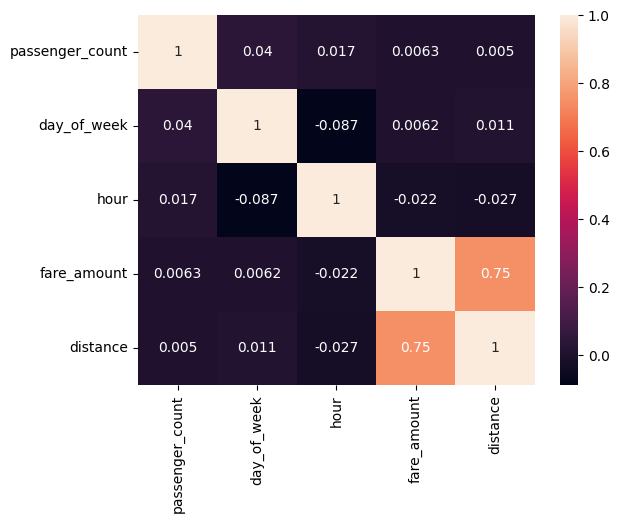

In [17]:
sns.heatmap(cor,annot=True)

In [18]:
xn=x.drop(['fare_amount'],axis=1)
y=x['fare_amount']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(xn,y,test_size=0.2,random_state=42)

In [21]:
l_model=LinearRegression()

In [22]:
l_model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=l_model.predict(x_test)

In [24]:
from sklearn.metrics import r2_score,root_mean_squared_error

In [25]:
l_r2=r2_score(y_test,y_pred)
l_rmse=root_mean_squared_error(y_test,y_pred)

In [26]:
print("Linear model r2 : ",l_r2)
print("Linear model rmse : ",l_rmse)

Linear model r2 :  0.46608139238089896
Linear model rmse :  6.939197881804118


In [27]:
r_model=RandomForestRegressor(n_estimators=100)
r_model.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
r_y_pred=r_model.predict(x_test)

In [29]:
r_r2=r2_score(y_test,r_y_pred)
r_rmse=root_mean_squared_error(y_test,r_y_pred)

In [30]:
print("RandomForest model r2 : ",r_r2)
print("RandomForest model rmse : ",r_rmse)

RandomForest model r2 :  0.7327964775164624
RandomForest model rmse :  4.908997753920455
